Play list de youtube
https://www.youtube.com/playlist?list=PL4wzlfHhrqQzJfrxDv2nYmLwvDBZmPb9-

# Bernstein-Vazarani
Quantum Computing Course: 3.5 Bernstein-Vazarani Algorithm

Ref: https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep6_Bernstein-Vazirani_Algorithm.ipynb

In [ ]:
!pip install qiskit
!pip install pylatexenc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=f78a9e45daa2adb29916f8017341995383c2bed01534bf9c7c1bf296b7fb94e2
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
from qiskit import *
import math

s = '00'
n = len(s)

circuit = QuantumCircuit(n+1,n)

In [ ]:
# Step 0

circuit.x(n) # the n+1 qubits are indexed 0...n, so the last qubit is index n

circuit.barrier() # just a visual aid for now

# Step 1

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

# Step 2

for ii, yesno in enumerate(reversed(s)):
    if yesno == '1':
        circuit.cx(ii, n)

circuit.barrier() # just a visual aid for now

# Step 3

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

circuit.measure(range(n), range(n)) # measure the qubits indexed from 0 to n-1 and store them into the classical bits indexed 0 to n-1

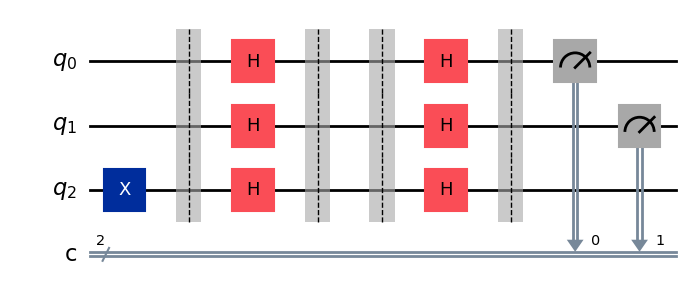

In [ ]:
import math

circuit.draw(output='mpl')

In [ ]:
!pip install qiskit-aer



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 32.4 MB/s eta 0:00:00


In [ ]:
from qiskit_aer import *
simulator = Aer.get_backend('qasm_simulator')

In [ ]:
# Legacy path
from qiskit import transpile
new_circuit = transpile(circuit, simulator)
job = simulator.run(new_circuit, shots=1)

{'00': 1}


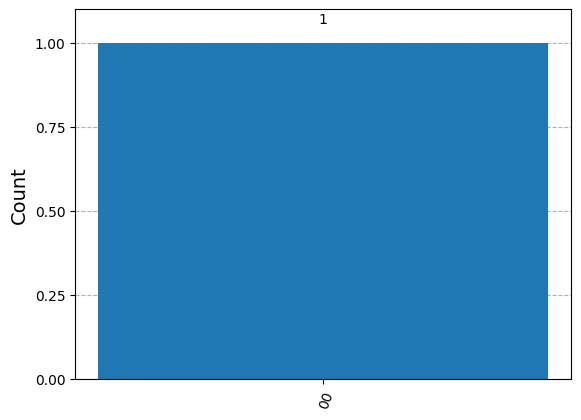

In [ ]:
from qiskit.visualization import plot_histogram
result = job.result()

counts = result.get_counts(new_circuit)
print(counts)

# Plot the histogram of the counts
plot_histogram(counts)



# QFT

Quantum Computing Course: 3.6 Quantum Fourier Transform

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

In [ ]:
# Función para aplicar QFT
def qft(circuit, n):
    """Aplica la QFT en los primeros n qubits del circuito."""
    for j in range(n):
        circuit.barrier()
        circuit.h(j)
        for k in range(j + 1, n):
            circuit.cp(np.pi / 2 ** (k - j), k, j)
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)

def inverse_qft(circuit, n):
    """Aplica la QFT inversa en los primeros n qubits del circuito."""
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)
    for j in range(n - 1, -1, -1):
        for k in range(j - 1, -1, -1):
            circuit.cp(-np.pi / 2 ** (j - k), k, j)
        circuit.h(j)
        circuit.barrier()

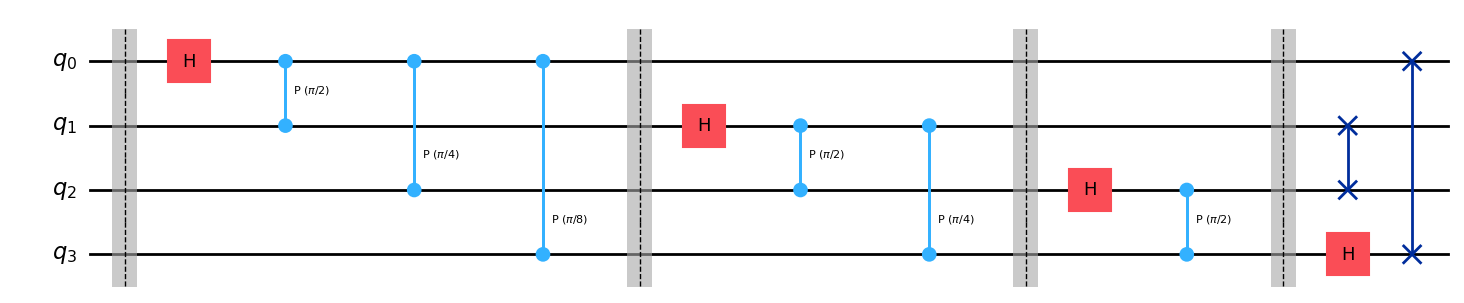

In [ ]:
from qiskit import *
import numpy as np

n=4
qc = QuantumCircuit(n)
qft(qc, n)

# Dibujar el circuito después de aplicar la QFT
qc.draw(output='mpl')

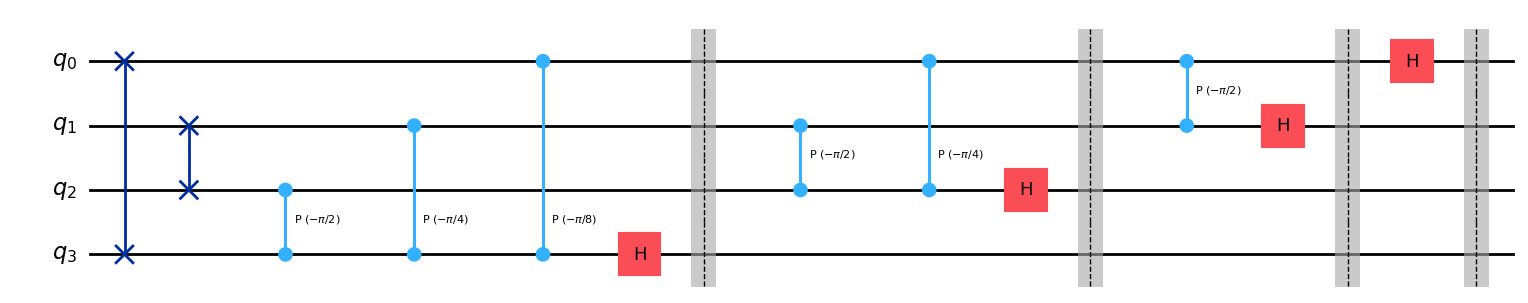

In [ ]:
qci = QuantumCircuit(n)
inverse_qft(qci, n)

# Dibujar el circuito después de aplicar la QFT_INVERSA
qci.draw(output='mpl')



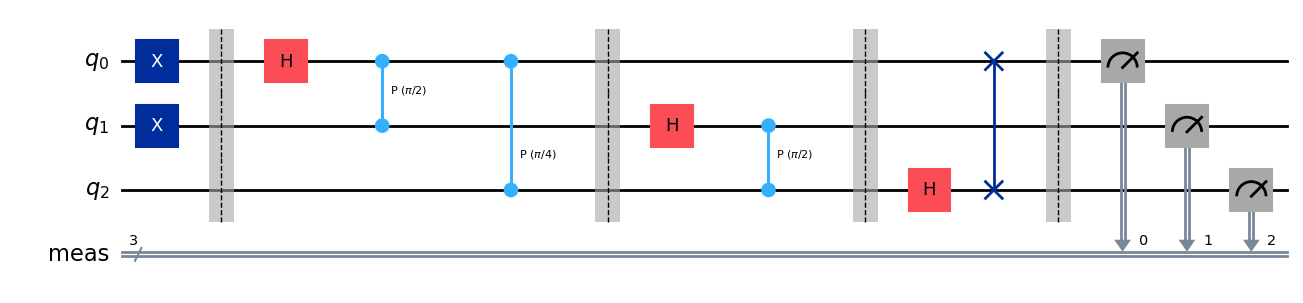

In [ ]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import *
from qiskit.visualization import plot_histogram
import numpy as np


# Crear un circuito cuántico con n qubits
n = 3  # Número de qubits
qc = QuantumCircuit(n)

# Inicializar qubits a un estado específico (por ejemplo, |110>)
qc.x(0)
qc.x(1)

# Dibujar el circuito inicial
qc.draw(output='mpl')

# Aplicar la QFT en los primeros n qubits
qft(qc, n)

# Medir todos los qubits
qc.measure_all()


# Dibujar el circuito después de aplicar la QFT
qc.draw(output='mpl')


{'110': 116, '100': 128, '001': 140, '011': 134, '111': 122, '101': 132, '010': 115, '000': 113}


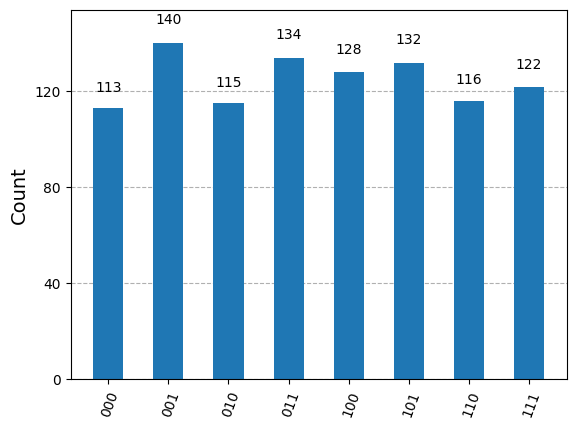

In [ ]:


# Usar el simulador qasm_simulator de Aer
simulator = Aer.get_backend('qasm_simulator')

# Compilar y ensamblar el circuito cuántico
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)

result = job.result()

# Obtener el conteo de medidas
counts = result.get_counts(qc)
print(counts)

# Graficar el histograma de los conteos
plot_histogram(counts)


#Amplitude Amplification + Grover

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=65529451618ccf6e9502f781327ea1afea7c5c2a6f7063f219f3a92aefdc8630
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 82.5 MB/s eta 0:00:00


In [ ]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import Aer

In [ ]:
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.circuit.library import MCXGate
from qiskit.visualization import plot_distribution, plot_histogram


In [ ]:
def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        if zero_inds:
           qc.x(zero_inds)
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)
        if zero_inds:
           qc.x(zero_inds)

    qc.barrier()
    return qc


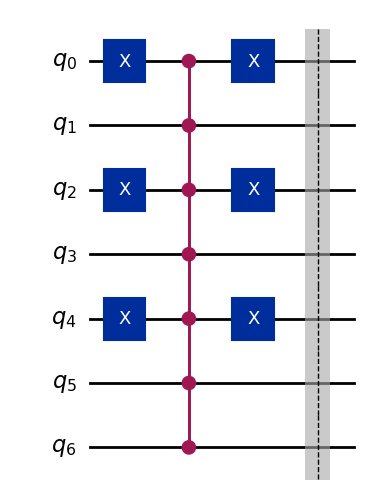

In [ ]:
marked_states = ["1101010"]

oracle = grover_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")

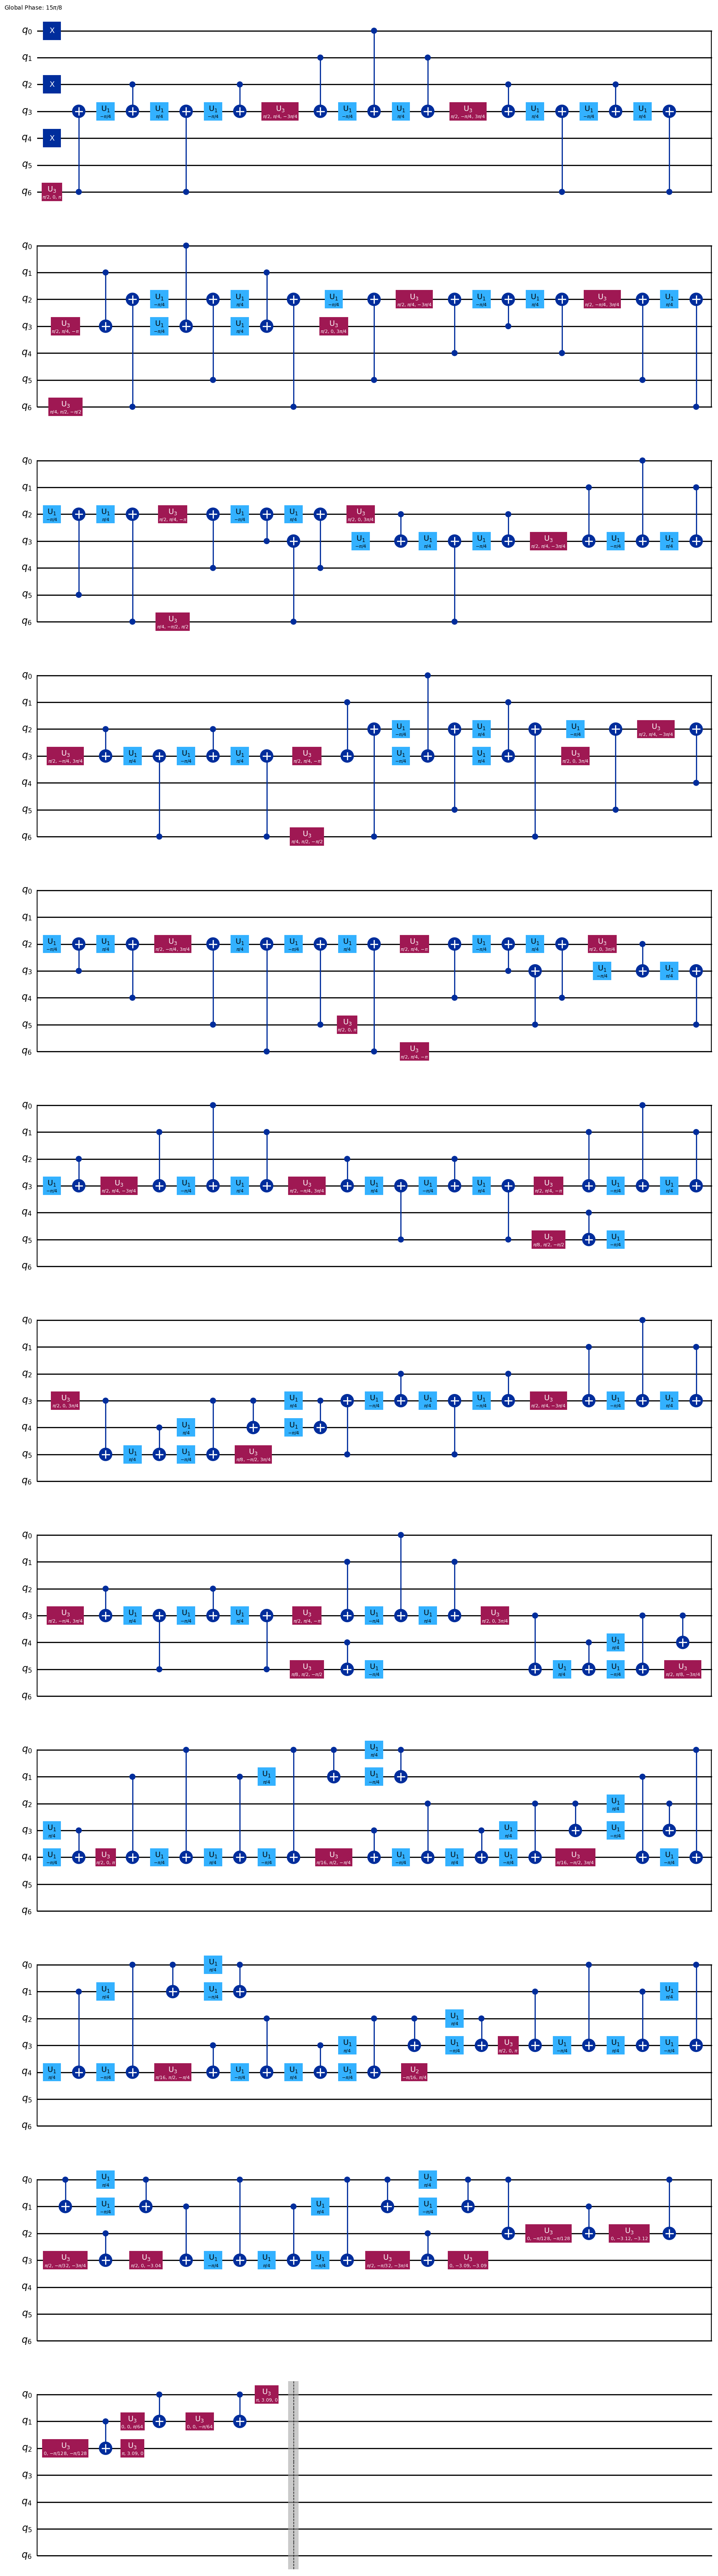

In [ ]:
# Descomposición del circuito
basis_gates = ['u1', 'u2', 'u3', 'cx', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 't', 'tdg']
decomposed_qc = transpile(oracle, basis_gates=basis_gates)
# Dibujar el circuito descomposto
decomposed_qc.draw('mpl', style="iqp")

In [ ]:
def multi_cz(circuit, control_qubits, target_qubit):
    n_controls = len(control_qubits)

    if n_controls == 0:
        circuit.z(target_qubit)
    elif n_controls == 1:
        circuit.cz(control_qubits[0], target_qubit)
    else:
        # Aplicar H a la qubit objetivo
        circuit.h(target_qubit)

        # Aplicar puerta multi-control-Toffoli
        circuit.mcx(control_qubits, target_qubit)

        # Aplicar H a la qubit objetivo
        circuit.h(target_qubit)

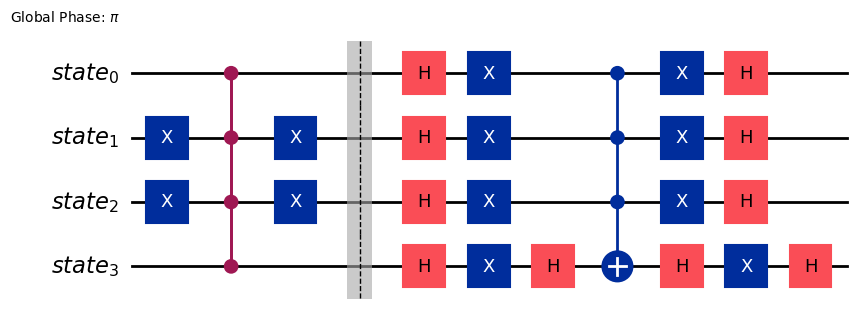

In [ ]:
grover_op = GroverOperator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")

In [ ]:
import sympy as sp
from IPython.display import display, Math


# Definir las variables
pi = sp.pi
asin = sp.asin
sqrt = sp.sqrt
floor = sp.floor
len_marked_states = sp.Symbol('marked')
grover_op_num_qubits = sp.Symbol('qubits')

# Crear la expresión
expression = pi / 4 * sqrt(2**grover_op_num_qubits / len_marked_states )

# Convertir la expresión a LaTeX
latex_expression = sp.latex(expression)

display(Math(latex_expression))

optimal_num_iterations = math.floor(
    math.pi / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits))))

print("Optimal num Iterations:", optimal_num_iterations)


<IPython.core.display.Math object>

Optimal num Iterations: 3


Optimo: 3


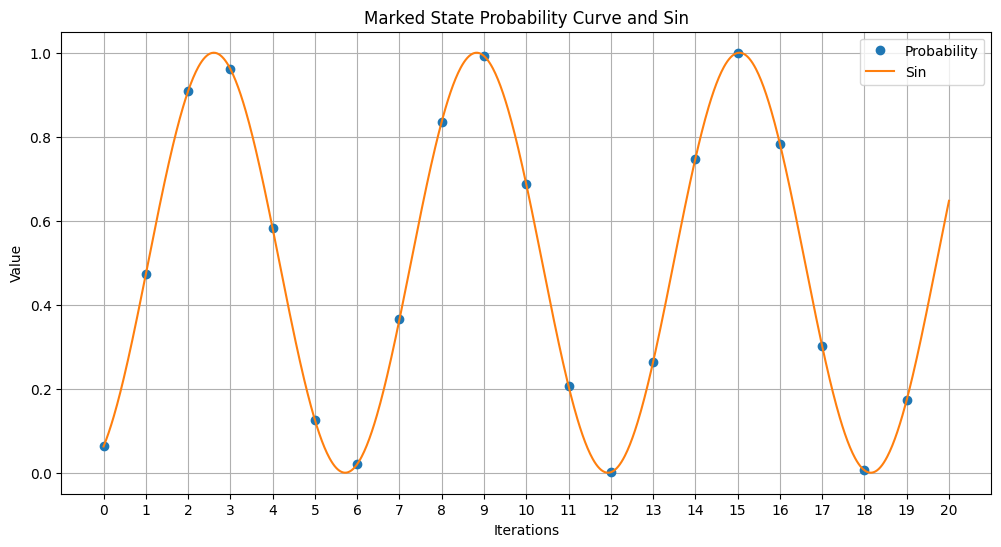

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


def optimal_iterations(num_qubits, num_marked_states):
    N = 2 ** num_qubits
    iterations = math.floor((math.pi / 4) * math.sqrt(N / num_marked_states))
    return iterations

def probability_of_success(iterations, num_qubits, num_marked_states):
    # Calcular theta
    theta = math.asin(math.sqrt(num_marked_states / (2 ** num_qubits)))

  # Calcular la probabilidad de éxito
    probability = math.sin((2 * iterations +1) * theta) ** 2
    return probability

# Function to calculate the probability of measuring a marked state
def marked_state_probability(iterations, num_qubits, num_marked_states):
    return (math.sin((2 * iterations + 1) * math.acos(math.sqrt(num_marked_states / (2 ** num_qubits)))) ** 2)

# Example values
num_qubits = grover_op.num_qubits
num_marked_states = len(marked_states)
max_iterations = 20

print("Optimo:", optimal_iterations(num_qubits, num_marked_states))

# Calculate probabilities for each iteration
iterations = np.arange(0, max_iterations)
probabilities = [probability_of_success(iteration, num_qubits, num_marked_states) for iteration in iterations]

# Calculate sin values for a denser set of iterations
dense_iterations = np.linspace(0, max_iterations, 1000)
sin_values = [probability_of_success(iteration, num_qubits, num_marked_states) for iteration in dense_iterations]

# Ajuste del tamaño de la figura
plt.figure(figsize=(12, 6))  # Ancho de 12 pulgadas, alto de 6 pulgadas

# Plot the curves
plt.plot(iterations, probabilities, 'o', label='Probability')
plt.plot(dense_iterations, sin_values, label='Sin')

plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Marked State Probability Curve and Sin')
plt.xticks(range(max_iterations + 1))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import math
def probability_of_success(num_qubits, num_marked_states, iterations):
   # Calcular theta
  theta = math.asin(math.sqrt(num_marked_states / (2 ** num_qubits)))

  # Calcular la probabilidad de éxito
  probability = math.sin((2 * iterations + 1) * theta) ** 2
  return probability

# Ejemplo de uso
num_qubits = grover_op.num_qubits
num_marked_states = len(marked_states)
iterations = 8

# Número de iteraciones
for i in range(iterations): print(i, "ite:", probability_of_success(num_qubits, num_marked_states, i))



0 ite: 0.0625
1 ite: 0.47265625
2 ite: 0.908447265625
3 ite: 0.9613189697265625
4 ite: 0.5817041397094724
5 ite: 0.1254916787147522
6 ite: 0.020380768924951515
7 ite: 0.36491288826800855


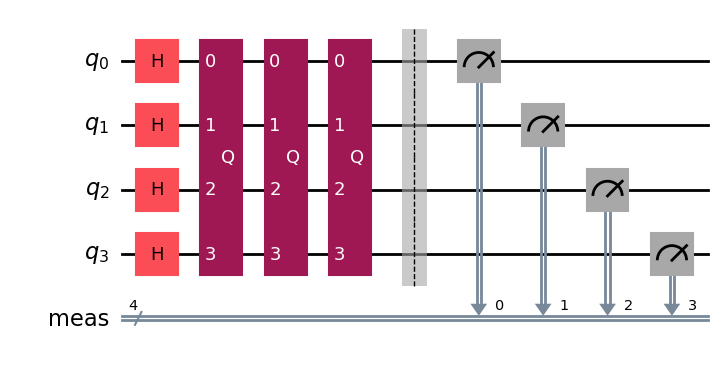

In [ ]:
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw(output="mpl", style="iqp")

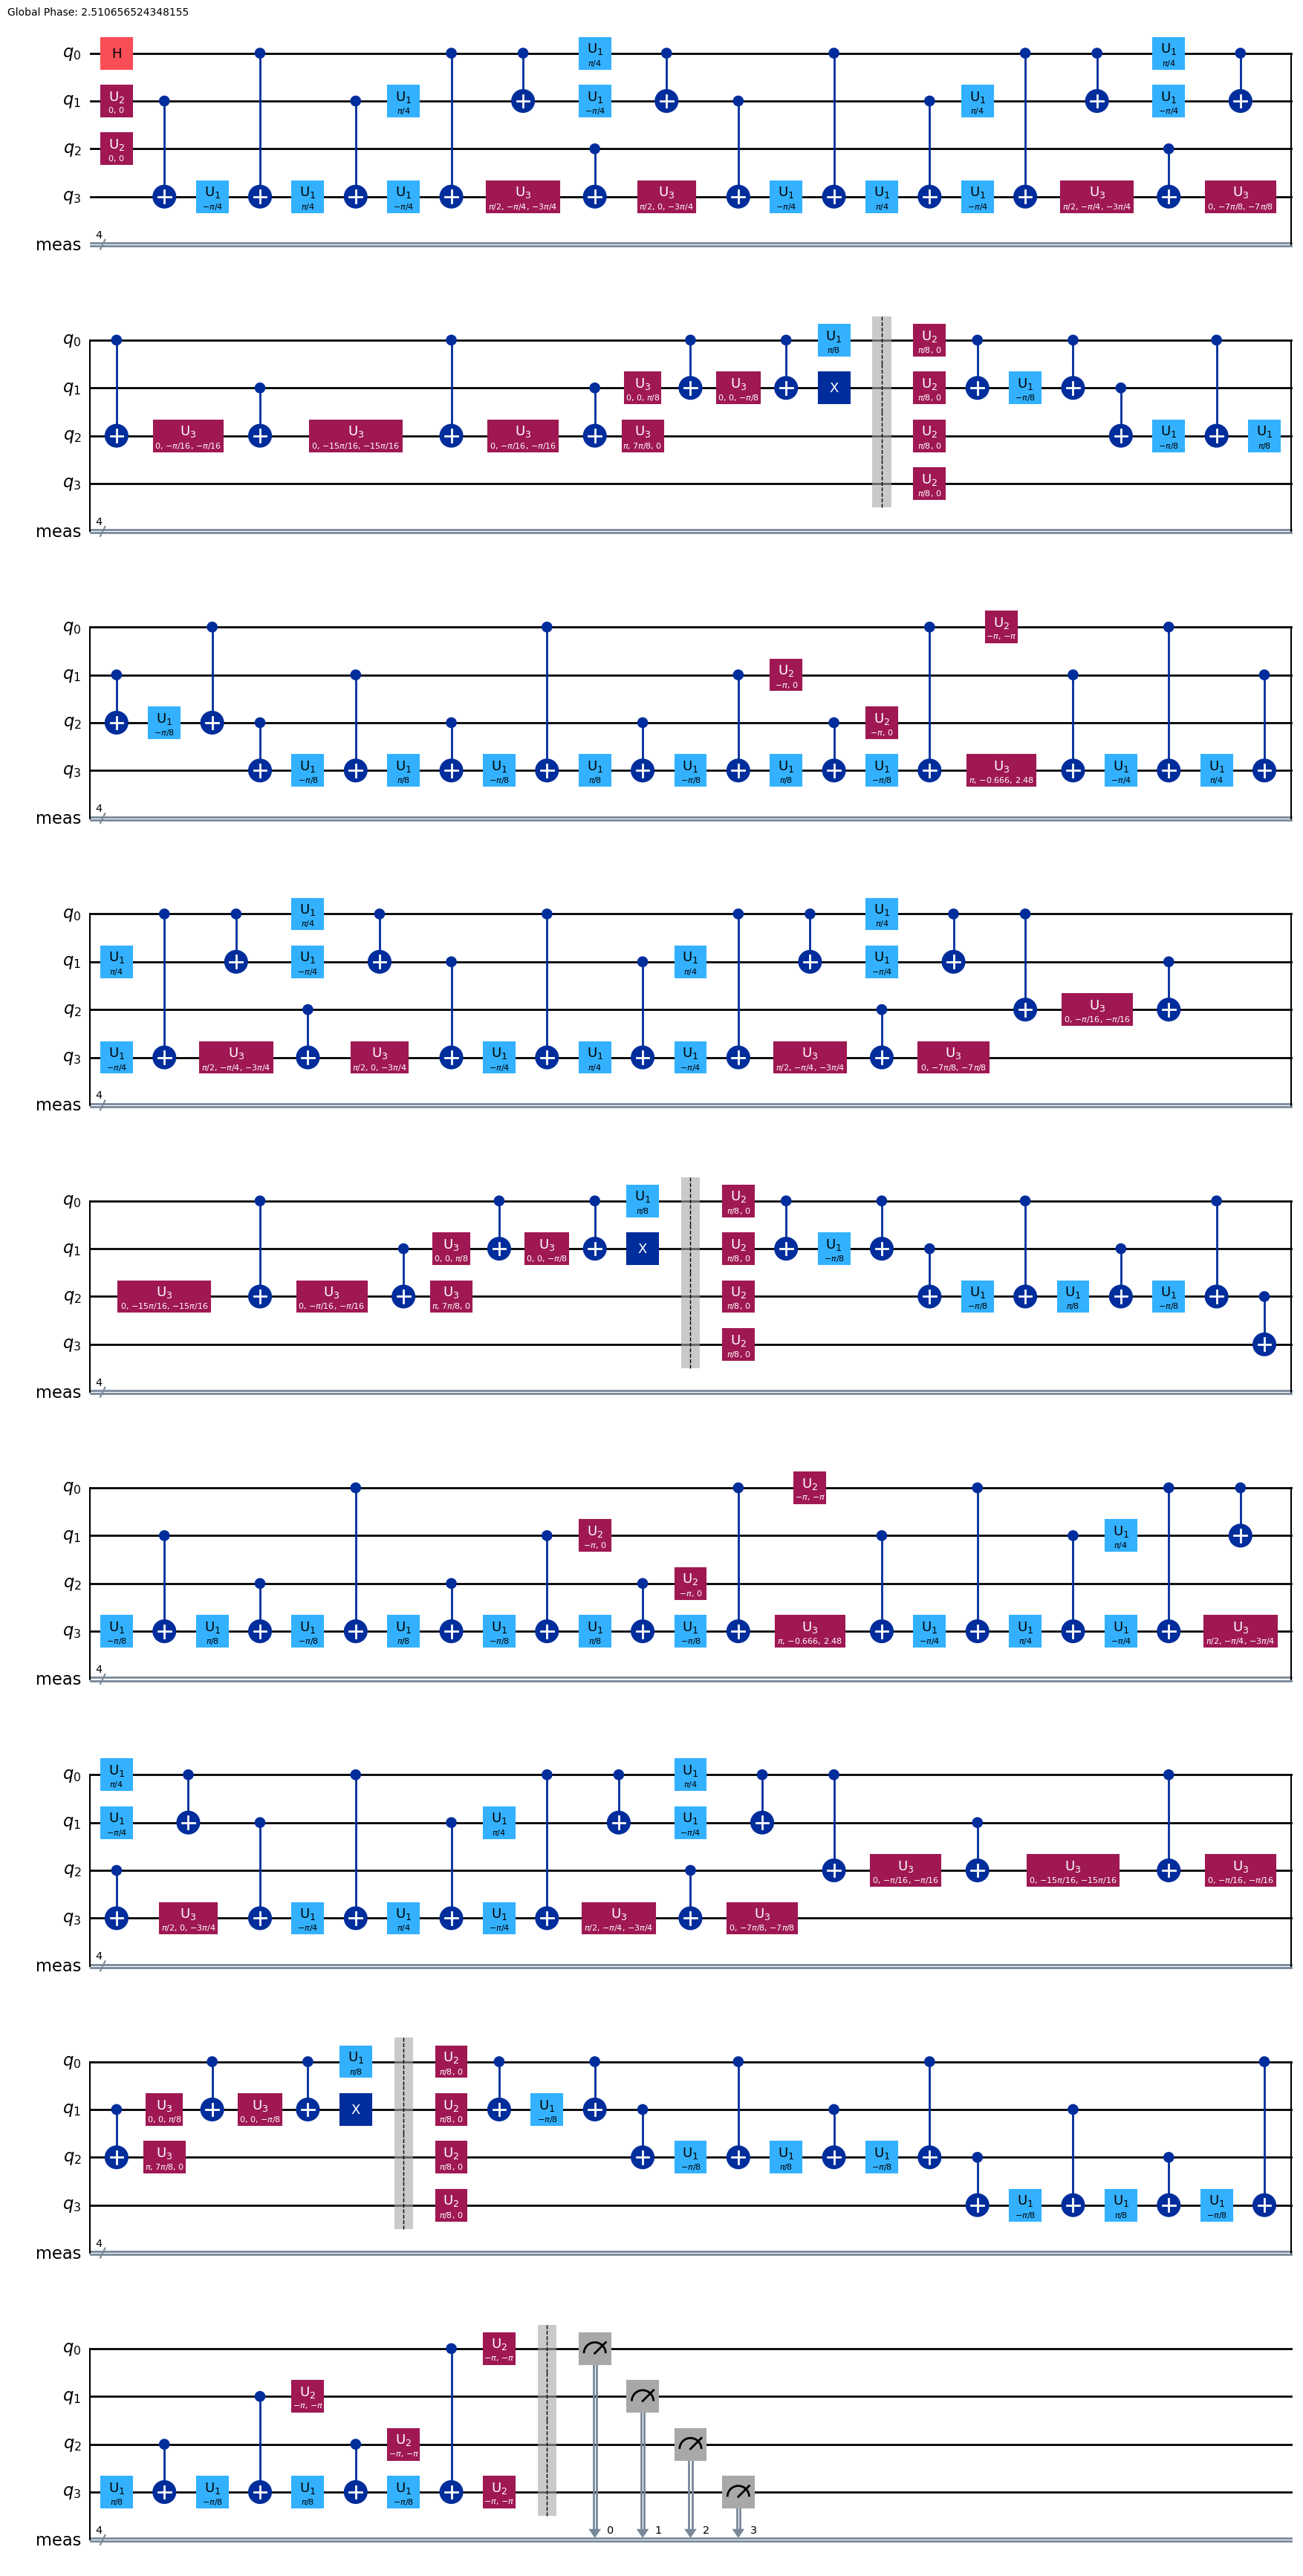

In [ ]:
# Descomposición del circuito
basis_gates = ['u1', 'u2', 'u3', 'cx', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 't', 'tdg']
decomposed_qc = transpile(qc, basis_gates=basis_gates)
# Dibujar el circuito descomposto
decomposed_qc.draw('mpl', style="iqp")

{'0000': 1, '1011': 6, '1100': 4, '0100': 14, '1001': 1949, '0101': 8, '1110': 4, '0111': 4, '0011': 3, '1101': 4, '1000': 6, '0110': 4, '1111': 5, '0010': 7, '1010': 5}


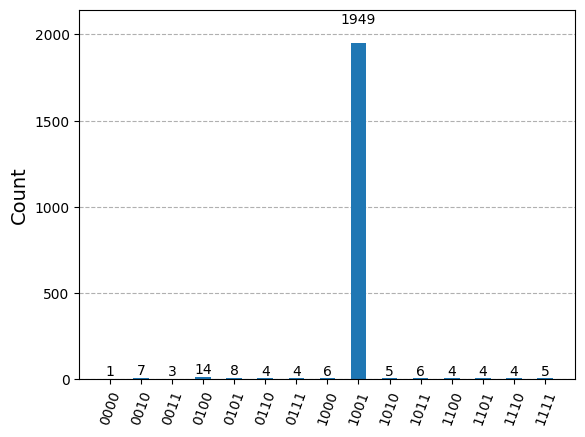

In [ ]:
# Usar el simulador qasm_simulator de Aer
simulator = Aer.get_backend('qasm_simulator')

# Compilar y ensamblar el circuito cuántico
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=2024)

result = job.result()
counts = result.get_counts(qc)
print(counts)

plot_histogram(counts)